<a href="https://colab.research.google.com/github/priyaadepu/Project-10-Intensity-Analysis/blob/main/intensityanaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
from google.colab import files
from textblob import TextBlob  # For sentiment analysis
!pip install emoji
import emoji  # For adding emojis


In [ ]:
# Upload CSV files
uploaded = files.upload()


Saving angriness.csv to angriness (2).csv
Saving happiness.csv to happiness (2).csv
Saving sadness.csv to sadness (2).csv


In [ ]:
# Load datasets
angriness_df = pd.read_csv("angriness.csv")
happiness_df = pd.read_csv("happiness.csv")
sadness_df = pd.read_csv("sadness.csv")

In [ ]:
# Combine all data into one DataFrame
data = pd.concat([angriness_df, happiness_df, sadness_df], ignore_index=True)

In [ ]:
# Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())
print(data['intensity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   intensity  2039 non-null   object
dtypes: object(2)
memory usage: 32.0+ KB
None
                                                  content  intensity
count                                                2039       2039
unique                                               1586          3
top     ['You Hurt Me But I Still Love You.', 'True Lo...  happiness
freq                                                  134        708
intensity
happiness    708
angriness    696
sadness      635
Name: count, dtype: int64


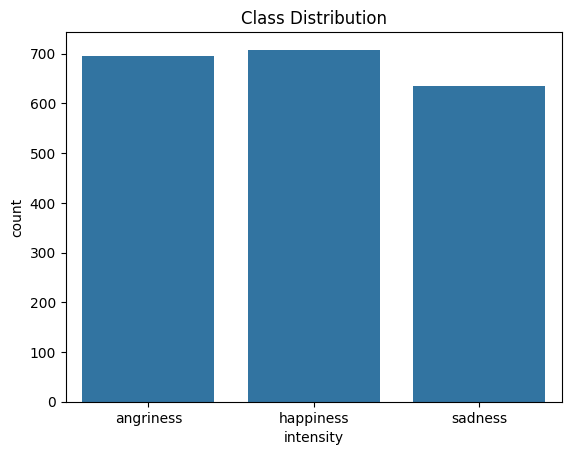

In [ ]:
# Visualizing class distribution
sns.countplot(x='intensity', data=data)
plt.title('Class Distribution')
plt.show()

In [ ]:

# Checking for missing values
print(data.isnull().sum())

content      0
intensity    0
dtype: int64


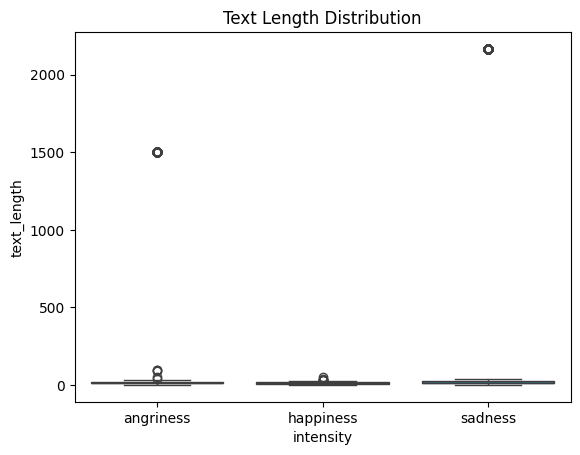

In [ ]:
# Detecting outliers in text length
data['text_length'] = data['content'].apply(lambda x: len(x.split()))
sns.boxplot(x='intensity', y='text_length', data=data)
plt.title('Text Length Distribution')
plt.show()

In [ ]:
# Removing outliers based on text length
Q1 = data['text_length'].quantile(0.25)
Q3 = data['text_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['text_length'] >= lower_bound) & (data['text_length'] <= upper_bound)]


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Text preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

In [ ]:
# Apply text preprocessing
data['cleaned_content'] = data['content'].apply(preprocess_text)

In [ ]:
# Convert labels to numeric values
label_mapping = {'angriness': 0, 'happiness': 1, 'sadness': 2}
data['label'] = data['intensity'].map(label_mapping)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_content'], data['label'], test_size=0.2, random_state=42)


In [ ]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)

    # Predictions
    y_pred = model.predict(X_test_tfidf)
 # Evaluation
    print(f"✅ {model_name} Accuracy Score:", accuracy_score(y_test, y_pred))
    print(f"📊 {model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print("📊 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Training Logistic Regression...
✅ Logistic Regression Accuracy Score: 0.7527777777777778
📊 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       125
           1       0.72      0.81      0.76       129
           2       0.75      0.65      0.70       106

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360

📊 Confusion Matrix:
[[ 98  15  12]
 [ 14 104  11]
 [ 11  26  69]]

Training Random Forest...
✅ Random Forest Accuracy Score: 0.7444444444444445
📊 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       125
           1       0.67      0.86      0.76       129
           2       0.78      0.60      0.68       106

    accuracy                           0.74       360
   macro avg       0.76    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


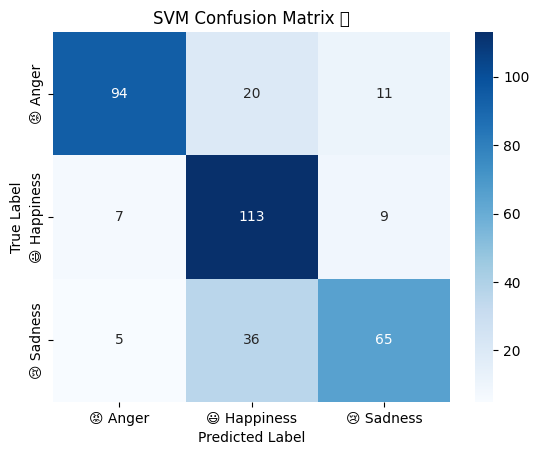

In [ ]:
# Confusion Matrix with Emoji Labels (Moved outside the loop)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['😡 Anger', '😃 Happiness', '😢 Sadness'],
            yticklabels=['😡 Anger', '😃 Happiness', '😢 Sadness'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'{model_name} Confusion Matrix 📊') # model_name will be the last model in the loop
plt.show()


In [ ]:
# Hyperparameter Tuning using GridSearchCV for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
# Get the best model
best_dt_model = grid_search.best_estimator_

In [ ]:
# Predictions with the best model
y_pred_best = best_dt_model.predict(X_test_tfidf)

In [ ]:
# Save model and vectorizer
import joblib
joblib.dump(best_dt_model, "decision_tree_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!


In [ ]:
# prompt: to download

files.download('decision_tree_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Show Emojis in Predictions
predictions = {0: "Angriness 😡", 1: "Happiness 😃", 2: "Sadness 😢"}
# Assuming you want to use y_pred_best for predictions:
y_pred = y_pred_best  # Assign y_pred_best to y_pred
for i, text in enumerate(X_test[:5]):
    print(f"🔹 Review: {text}")
    print(f"➡️ Predicted Intensity: {predictions[y_pred[i]]}\n")

🔹 Review: dont hate peoples love peoples loves
➡️ Predicted Intensity: Happiness 😃

🔹 Review: delete block keeping able see happy ’ without
➡️ Predicted Intensity: Angriness 😡

🔹 Review: missing someone able see worst feeling ever
➡️ Predicted Intensity: Sadness 😢

🔹 Review: may look calm head ’ killed times
➡️ Predicted Intensity: Angriness 😡

🔹 Review: love even hate
➡️ Predicted Intensity: Happiness 😃



In [ ]:
# another method for model depolyment
import joblib
from fastapi import FastAPI
from pydantic import BaseModel

# Load the trained model and vectorizer
model = joblib.load("decision_tree_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Initialize FastAPI
app = FastAPI()

# Define request structure
class TextRequest(BaseModel):
    text: str

@app.post("/predict")
def predict(request: TextRequest):
    try:
        # Transform input text
        transformed_text = vectorizer.transform([request.text])
        prediction = model.predict(transformed_text)
        return {"prediction": prediction[0]}
    except Exception as e:
        return {"error": str(e)}



In [ ]:
!uvicorn app:app --host 0.0.0.0 --port 8000 --reload
